# Artificial Neural Networks (ANN) - Customer Churn Classification Problem

ANN can be used for both Regression and Classification problems.  In this section, we will be using a Customer Churn dataset and build an ANN Classification Model.

The dataset '[Churn_Modelling.csv](https://www.kaggle.com/datasets/aakash50897/churn-modellingcsv)' is sourced from Kaggle.  It has 10,000 rows and 14 columns.  The column of interest is 'Exited' which has values 0 or 1.



---
## Exploratory Data Analysis


---




In [1]:
# prompt: Load packages to build ANN model

import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
# prompt: Read 'Churn_Modelling.csv'

df = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows to verify
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

The columns RowNumber, Surname and CustomerID do not influence Customer's decision to Exit.  Therefore, we can remove these columns from our analysis.

In [5]:
# prompt: Remove columns RowNumber, Surname and CustomerID

# The columns RowNumber and CustomerID do not influence Customer's decision to Exit.  Therefore, we can remove these columns from our analysis.
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Perform LabelEncoding for Gender column

In [6]:
# prompt: Perform Label Encoding for Gender

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print(df.head())


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       0   42       2       0.00              1   
1          608     Spain       0   41       1   83807.86              1   
2          502    France       0   42       8  159660.80              3   
3          699    France       0   39       1       0.00              2   
4          850     Spain       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [9]:
# prompt: Perform One Hot encoding for Geography column in the dataset

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(df))
print(df.head())

    0    1    2      3    4     5    6          7    8    9    10         11  \
0  1.0  0.0  0.0  619.0  0.0  42.0  2.0       0.00  1.0  1.0  1.0  101348.88   
1  0.0  0.0  1.0  608.0  0.0  41.0  1.0   83807.86  1.0  0.0  1.0  112542.58   
2  1.0  0.0  0.0  502.0  0.0  42.0  8.0  159660.80  3.0  1.0  0.0  113931.57   
3  1.0  0.0  0.0  699.0  0.0  39.0  1.0       0.00  2.0  0.0  0.0   93826.63   
4  0.0  0.0  1.0  850.0  0.0  43.0  2.0  125510.82  1.0  1.0  1.0   79084.10   

    12  
0  1.0  
1  0.0  
2  1.0  
3  0.0  
4  0.0  


In [10]:
# prompt: Split into train and test datasets

from sklearn.model_selection import train_test_split

# ... (your existing code)

# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df.iloc[:, -1].values   # Target variable (last column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Since Balance and Estimated_Salary have a wide range of values, we will need to Scale these columns

In [11]:
# prompt: Perform scaling for train and test data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



---


## Build ANN Model

---



Now that we have completed Pre-processing the data, it is time to build the ANN Model

In [12]:
# prompt: Initialize ANN

# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



---

## Train ANN Model



---

Training ANN Model involves 2 Steps:


*   Compiling ANN model
*   Fit the ANN model

'adam' is a optimizer that performs Stocastic Gradient Descent to update Weights during training and minimize the loss.

Since this is Binary Classification problem, 'binary_crossentropy' is used.

Our Model Performance metric will be 'accuracy'.



In [13]:
# prompt: compile ANN model

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Now that the model is built and compiled, the next step is to Train the model using the train dataset.

By specifying the batch_size, we will be able to see the Accuracy achieved at the end of each batch.

Also, we can control when to end the training by specifying the number of iterations or Epochs.

In [14]:
# prompt: Train the ANN classification model using train dataset

# Fitting the ANN to the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7980 - loss: 0.5729
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7971 - loss: 0.4582
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.4290
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.4329
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7918 - loss: 0.4348
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4237
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4205
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8117 - loss: 0.4105
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8161 - loss: 0.4174
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8253 - loss: 0.4080
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.4010
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Note at the end of 1st Epoch, the Accuracy was 0.7980.  By the end of 100 Epochs, the Accuracy improved to 0.8692 - which is significant.



---

## Predict using Test data



---



In [15]:
# prompt: Predict using test data

import numpy as np
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0. 0.]
 [0. 1.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1523   72]
 [ 206  199]]


0.861

[[1523   72]
 [ 206  199]]
Accuracy: 0.861


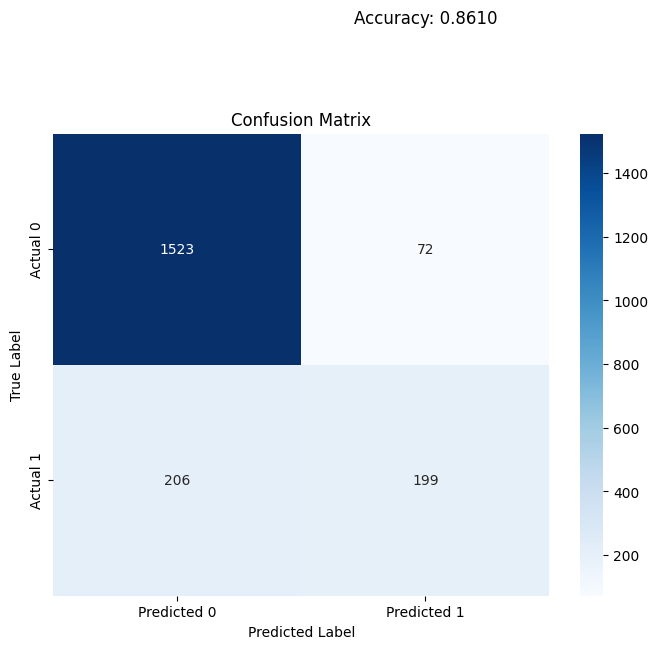

In [16]:
# prompt: Visualize Confusion Matrix.  Include Accuracy below the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Add accuracy below the confusion matrix
plt.text(1.5, -0.5, f"Accuracy: {accuracy:.4f}", ha='center', va='center', fontsize=12)

plt.show()

In [18]:
# prompt: print Recall and Precision values table

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1595
         1.0       0.73      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000





---

## Conclusions:



---

Our Model does an Excellent job of correctly Predicting Customers who DO NOT EXIT (0.0).  This is shown by Recall value of 0.95 and Precision of 0.88.

However, the model does rather poorly predicting Customer who DO EXIT (1.0).  The Recall is only 0.49.  In other words, for every 2 customers who Actually Exit, our model is able to correctly Predict only 1 of them.

One of the possible explanations for this, is that the Training dataset is imbalanced.  While there are 6368 NOT EXITED rows, there are only 1632 EXITED.  This means that the model did not have enough opportunity to learn how to identify EXITED as compared to NOT EXITED.

Techniques like Over Sampling can be employed to handle these kinds of situations.

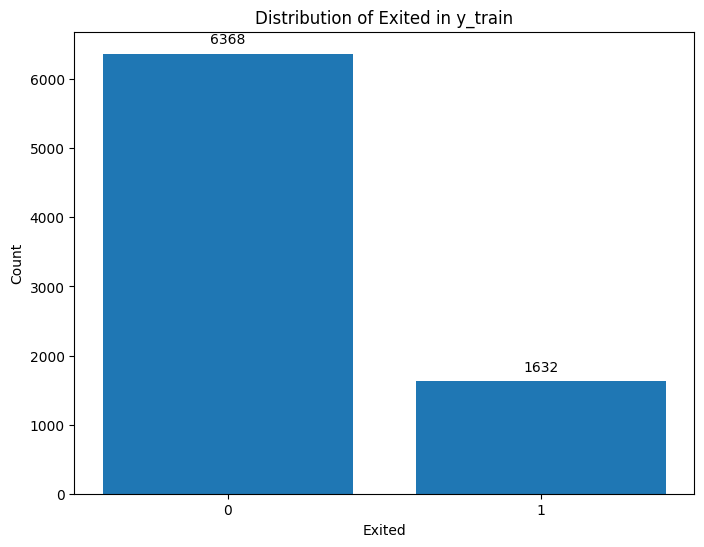

In [23]:
# prompt: Visualize Exited in y_train data.  Display values on the plot

# Count the occurrences of each unique value in y_train
value_counts = pd.Series(y_train).value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, yval, ha='center', va='bottom')

plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Distribution of Exited in y_train")
plt.xticks(value_counts.index)
plt.show()